**#0 Importy**

In [185]:
# Importy związane z danymi i modelowaniem
import numpy as np
from sklearn.model_selection import train_test_split

# Importy związane z TensorFlow i Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# Importy związane z wizualizacją
import matplotlib.pyplot as plt

**I CZĘŚĆ**

**#1 Wczytanie danych**

In [186]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli 
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

**#2 Podział danych**

In [187]:
X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

**#3 Tworzenie modelu**

In [188]:
f_mnist_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Spłaszczenie wejścia
    layers.Dense(512, activation='relu'),  # Więcej neuronów
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Warstwa wyjściowa
])

C:\Users\Mateusz\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**#4 Kompilacja modelu**

In [189]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.005),
    metrics=['accuracy']
)

**#5 Podgląd modelu**

In [190]:
f_mnist_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

**#6 Szkolenie modelu**

In [191]:
train_stats = f_mnist_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7451 - loss: 0.7184
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8455 - loss: 0.4248
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8598 - loss: 0.3943
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8666 - loss: 0.3750
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8749 - loss: 0.3465
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8752 - loss: 0.3511
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8784 - loss: 0.3313
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8780 - loss: 0.3372
Epoch 9/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8819 - loss: 0.3280
Epoch 10/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8844 - loss: 0.3302
Epoch 11/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8842 - loss: 0.3223
Epoch 12/30
1688/16

**#7 Ocena modelu**

In [192]:
test_loss, test_acc = f_mnist_model.evaluate(X_test, y_test)
print(f"Dokładność na zbiorze testowym: {test_acc:.2f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8859 - loss: 0.4239
Dokładność na zbiorze testowym: 0.88


Model osiągnął dokładność 88% na zbiorze testowym przy większej liczbie neuronów (512 vs 300) oraz współczynniku uczenia równym 0.005.

**II CZĘŚĆ**

**#8 Zapisanie i załadowanie nowego modelu**

In [193]:
f_mnist_model.save('fashion_mnist_model.keras')

In [194]:
new_model = tf.keras.models.load_model('fashion_mnist_model.keras')

**#9 Wizualizacja klas**

In [195]:
def predict_image(image):
    image = np.expand_dims(image, axis=(0, -1))  # Dopasowanie wymiarów
    prediction = new_model.predict(image)
    predicted_label = np.argmax(prediction)

    # Wyświetlenie obrazu
    plt.imshow(image.squeeze())
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


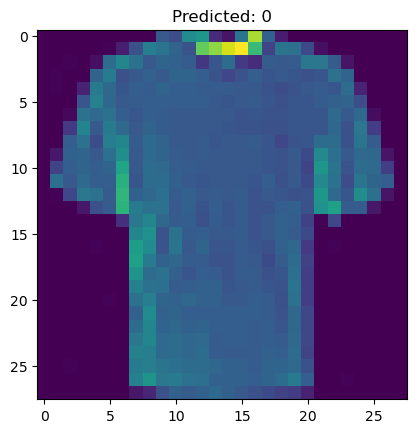

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


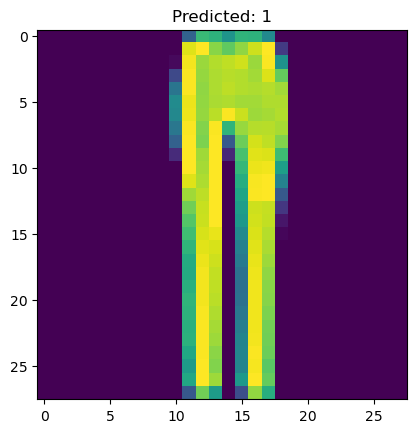

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


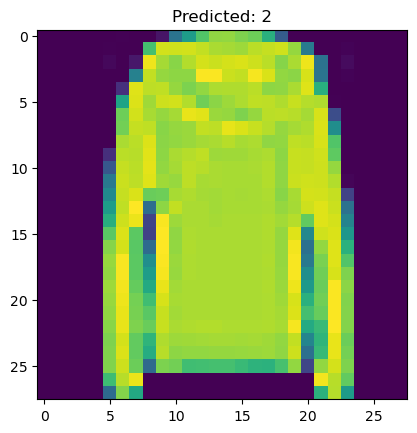

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


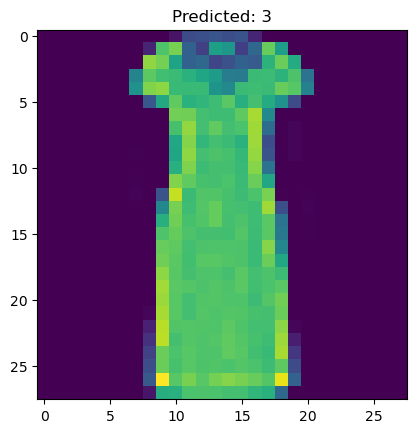

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


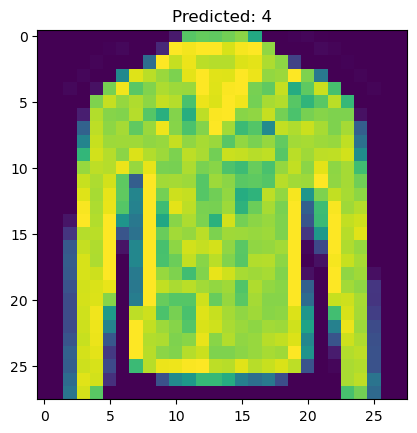

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


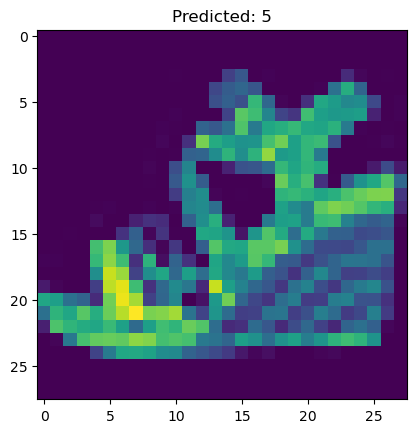

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


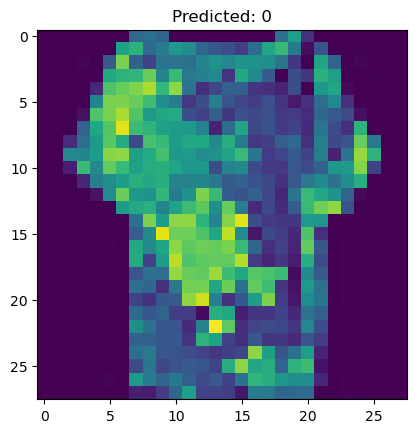

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


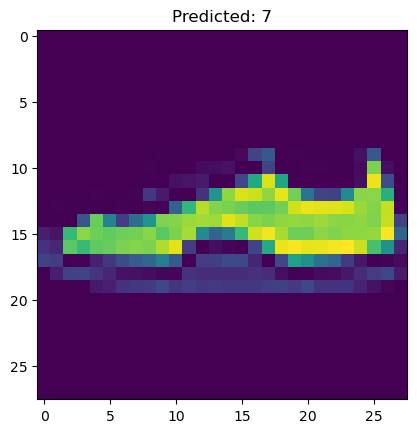

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


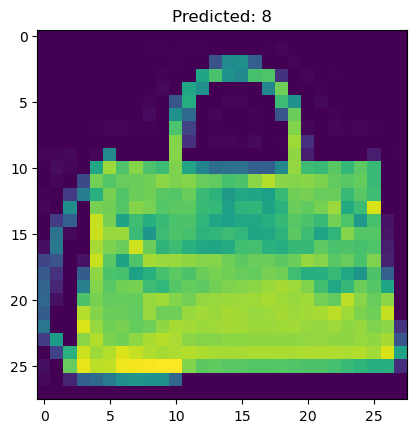

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


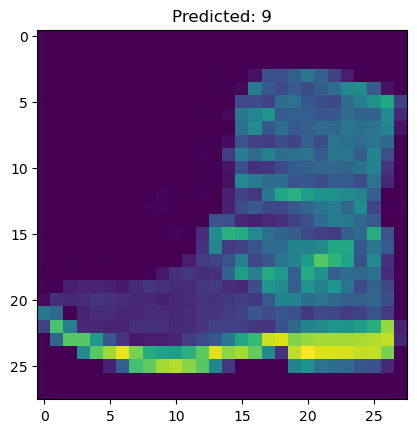

In [196]:
# Iteracja przez 10 klas
for i in range(10):
    image = X_test[y_test == i][0] 
    predict_image(image)

**III CZĘŚĆ**

**# Dodanie scheduler'a**

In [197]:
def const_scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Dodanie scheduler do treningu
lr_callback = LearningRateScheduler(const_scheduler)

**#10 Tworzenie generatora augmentacji**

In [198]:
# Rozbudowa danych do 4 wymiarów
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

datagen = ImageDataGenerator(
    width_shift_range=0.1,  # Przesunięcie obrazu w poziomie o 10% 
    height_shift_range=0.1, # Przesunięcie obrazu w pionie o 10% 
    shear_range=0.1,        # Shear (ścięcie) obrazu o 10% 
    zoom_range=0.1,         # Zoomowanie obrazu o 10% 
    horizontal_flip=True,   # Losowe odbicie obrazu w poziomie
    vertical_flip=False,    # Brak losowego odbicia obrazu w pionie
    fill_mode='constant'    # Sposób wypełniania nowych pikseli po transformacjach 
)


**#11 Dopasowanie generatora do danych treningowych**

In [199]:
train_datagen = datagen.flow(X_train, y_train, batch_size=32)

**#12 Szkolenie modelu przy użyciu augmentacji danych**

In [200]:
train_stats = new_model.fit(train_datagen, epochs=30, batch_size=32, verbose=1, callbacks=[lr_callback])

C:\Users\Mateusz\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.5371 - loss: 1.8000 - learning_rate: 0.0010
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.6596 - loss: 0.9139 - learning_rate: 0.0010
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7012 - loss: 0.8063 - learning_rate: 0.0010
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.7299 - loss: 0.7346 - learning_rate: 0.0010
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7498 - loss: 0.6736 - learning_rate: 0.0010
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7615 - loss: 0.6498 - learning_rate: 0.0010
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7652 - loss: 0.6377 - learning_rate: 0.0010
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7774 - loss: 0.6038 - learning_rate: 0.0010
Epoch 9/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7838 - loss: 0.590

**#13 Ocena modelu z augmentacją danych**

In [201]:
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Dokładność na zbiorze testowym po augmentacji: {test_acc:.2f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3824
Dokładność na zbiorze testowym po augmentacji: 0.86


**#14 Podsumowanie**

Model bez augmentacji osiągnął 88% dokładności, podczas gdy model z augmentacją uzyskał 86%. Choć augmentacja minimalnie obniżyła wynik na zbiorze testowym, zwiększyła różnorodność danych, co może poprawić generalizację. Możliwe, że przy większej liczbie epok model z augmentacją osiągnąłby lepszy wynik.